#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

## Importing the libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [12]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


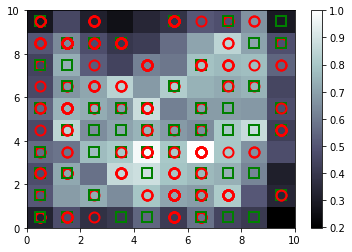

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,3)], mappings[(6,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15719940
15711742
15761733
15770995
15699963
15736399
15766734
15667934
15594305
15664793
15670029
15763579
15662189
15793825
15696361
15568469
15782159
15586479
15717700
15705379
15646535
15749964


# Part 2 - Going from Unsupervised to Supervised Deep Learning

## Create Matrix of Features

In [13]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [17]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
	if dataset.iloc[i, 0] in frauds:
		is_fraud[i] = 1

# Part 3 - ANN

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

## Import Tensorflow

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Initializing the ANN

In [26]:
ann = Sequential()

## Adding the input layer and the first hidden layer

In [27]:
ann.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

## Adding the output layer

In [28]:
ann.add(Dense(units=1, activation='sigmoid'))

## Compiling the ANN

In [29]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the ANN

In [30]:
ann.fit(customers, is_fraud, batch_size=1, epochs=3)

Epoch 1/3
690/690 [==============================] - 2s 601us/step - loss: 0.4482 - accuracy: 0.9493
Epoch 2/3
690/690 [==============================] - 0s 581us/step - loss: 0.1846 - accuracy: 0.9681
Epoch 3/3
690/690 [==============================] - 0s 556us/step - loss: 0.0973 - accuracy: 0.9681


## Predicting probability of fraud

In [44]:
prediction = ann.predict(customers)
prediction = np.concatenate((dataset.iloc[:, 0:1].values, prediction), axis=1)
prediction = prediction[prediction[:, 1].argsort()]
print(prediction)

[[1.55695950e+07 2.84972787e-03]
 [1.57704060e+07 3.49369645e-03]
 [1.55941330e+07 3.66693735e-03]
 ...
 [1.56700290e+07 4.77437854e-01]
 [1.57938250e+07 4.78763729e-01]
 [1.56963610e+07 4.89727765e-01]]
